# Module 07 Digit Recognizer

Isha Singh


Professor Irene Tsapara


MSDS 422 Practical Machine Learning 


1 March 2025

### PART 01 Introduction

##### The following research is based on the Kaggle Competition: Digit Recognizer. The main goal of this study is to classify handwritten digits (0-9) using neural networks. Different model factors will be evaluated by modifying hyperparameters such as the number of layers, neurons per layer, activation functions, optimizers, and batch sizes. By experimenting with different types of hyperparameters, the model will be created as a stronger output for classifying and recognizing digits. The analysis will also reflect on the following factors: training time, validation accuracy, loss curves, confusion matrices, and ROC curves to compare model performances. Additionally, another main factor in this research will include a benchmark experiment that consists of a 2×2 crossed design to evaluate how the different architectural choices impact classification accuracy. The results will provide insights into the accuracy and precision of the different types of neural networks, and from that, it will be recognized as the most optimal model for handwritten digit recognition.

### PART 02 Data load / Libraries load

Libraries load

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import time

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:

import seaborn as sns

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Dense, Flatten

In [14]:
from tensorflow.keras.optimizers import SGD

In [15]:
from tensorflow.keras.optimizers import Adam

Data load 

In [16]:
train_digit_recognizer_dataframe = pd.read_csv("/Users/isingh/Desktop/digit-recognizer/train.csv")

In [122]:
test_digit_recognizer_dataframe = pd.read_csv("/Users/isingh/Desktop/digit-recognizer/test.csv")

### PART 03 Data Presentation

##### The dataset used has 42,000 training images and 28,000 test images, where each specific image is 28 x 28 pixels in grayscale with values that range from 0 to 255. The value 0 represents white, and 255 represents black. The training set includes a label column that indicates the digits 0-9; however, the test dataset incorporates only test set image data. Some of the observations that were noticed during the procedure were that no missing values were found within the dataset, each of the digits from 0-9 is explicitly there, and there were various different samples of handwriting styles.

In [18]:
print("Training Data Shape:", train_digit_recognizer_dataframe.shape)
print("Test Data Shape:", train_digit_recognizer_dataframe.shape)

Training Data Shape: (42000, 785)
Test Data Shape: (42000, 785)


In [19]:
train_digit_recognizer_dataframe.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(train_digit_recognizer_dataframe.isnull().any().sum())
print(train_digit_recognizer_dataframe.isnull().any().sum())

0
0


### PART 04 EDA of DATASET

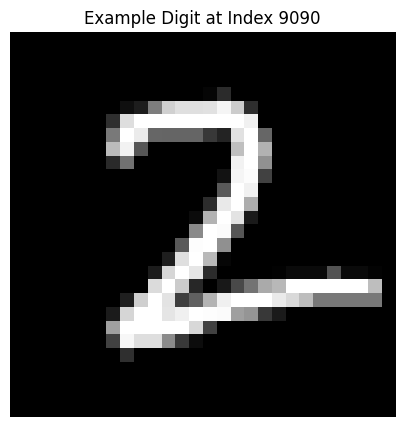

In [21]:
random_index = 9090
image_data = train_digit_recognizer_dataframe.iloc[random_index, 1:].values.reshape(28, 28)
plt.figure(figsize=(7, 5)) 
plt.imshow(image_data, cmap='gray')
plt.title(f"Example Digit at Index {random_index}")
plt.axis("off")
plt.show()


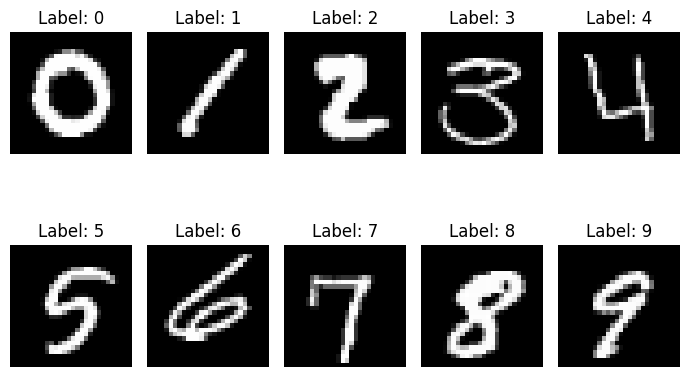

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(7, 5))
for digit in range(10):
    img = train_digit_recognizer_dataframe[train_digit_recognizer_dataframe['label'] == digit].iloc[0, 1:].values.reshape(28, 28)
    ax = axes.flatten()[digit]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {digit}")
    ax.axis("off")
plt.tight_layout()
plt.show()

Average Image for Each Digit 

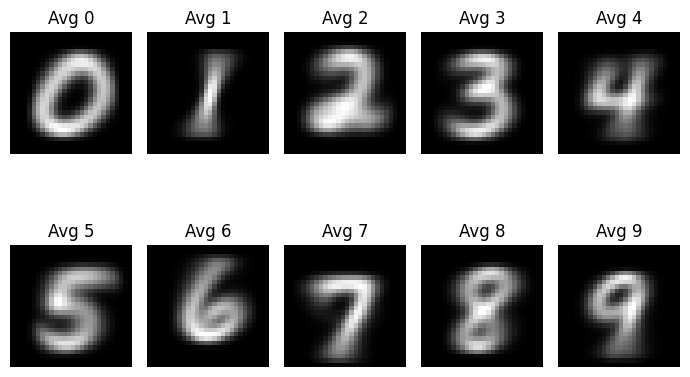

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(7, 5))
for i, digit in enumerate(range(10)):
    avg_image = train_digit_recognizer_dataframe[train_digit_recognizer_dataframe['label'] == digit].iloc[:, 1:].mean().values.reshape(28, 28)
    ax = axes.flat[i]
    ax.imshow(avg_image, cmap='gray')
    ax.set_title(f"Avg {digit}")
    ax.axis("off")
plt.tight_layout()
plt.show()

Pixel Variance For Digit

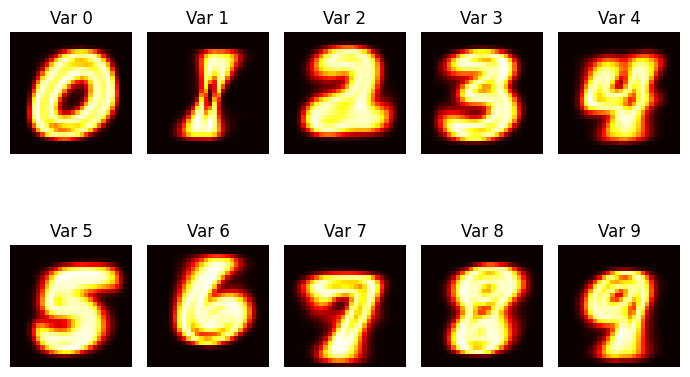

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(7, 5))
for digit in range(10):
    var_image = train_digit_recognizer_dataframe[train_digit_recognizer_dataframe['label'] == digit].iloc[:, 1:].var().values.reshape(28, 28)
    ax = axes[digit // 5, digit % 5]
    ax.imshow(var_image, cmap='hot')
    ax.set_title(f"Var {digit}")
    ax.axis("off")
plt.tight_layout()
plt.show()

### PART 05 Overview of findings and next steps

##### As of this part of the research, we can understand that the dataset has no missing values, and therefore it is ready to proceed to the next step. Before we focus on training and modeling, there are some additional steps to take in order to make sure the model performs as expected. Firstly, the pixel values will be scaled between 0 and 1 in order for the process to have a better modeling procedure and improve training. As we know, the dataset is well-structured, so it is very unlikely to have outliers and pixel values that are considered to be unusual, and we can also assume that imputation will not be required as there were no missing values indicated within the training dataset.

##### Since the labels are already numerical, one-hot encoding will be applied in order to convert them into a binary suitable format for neural network training, and for that, we will use to_categorical. However, label encoding will be considered unnecessary as the labels are already structured in an appropriate manner.


##### As the dataset includes continuous pixel levels of intensity rather than discrete categories, binning will not be required. Previously, EDA was conducted to analyze pixel value patterns and variations, ensuring all digits (0–9) are properly represented. An outlier analysis will also be performed to detect any unusual pixel intensities that could impact training.

##### The next stages will involve the dataset being divided into three parts: testing, training, and validation. This will help evaluate how well the model performs. Afterwards, hyperparameter tuning will be used in order to optimize the models that were created for neural network performance by adjusting parameters such as the number of layers, neurons per layer, activation functions, and batch size. The adjustments in the hyperparameters will help create an improvement in the model's accuracy in being able to recognize digits that are handwritten.


### PART 06 Cleansing and Preprocessing

In [25]:
print("The number of missing values is", train_digit_recognizer_dataframe.isnull().any().sum())

The number of missing values is 0


Outliers

In [26]:
pixel_values = train_digit_recognizer_dataframe.drop(columns=['label']).values.flatten()

In [27]:
print("Pixel Value Statistics:")
print("Min:", np.min(pixel_values))
print("Max:", np.max(pixel_values))
print("Mean:", round(np.mean(pixel_values), 2))
print("Std Dev:", round(np.std(pixel_values), 2))

Pixel Value Statistics:
Min: 0
Max: 255
Mean: 33.41
Std Dev: 78.68


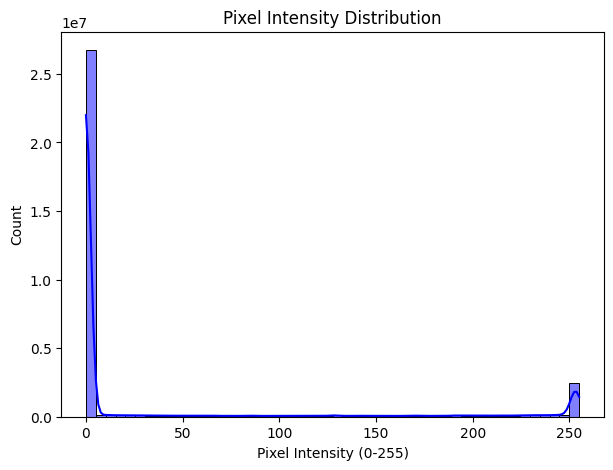

In [28]:
plt.figure(figsize=(7, 5))
sns.histplot(pixel_values, bins=50, kde=True, color='blue')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Count")
plt.title("Pixel Intensity Distribution")
plt.show()


### PART 07 FEATURE ENGINEERING

Extracting features and labels


X  is the Pixel values and Y is the labels 

In [29]:
X = train_digit_recognizer_dataframe.drop(columns=['label']).values 
y = train_digit_recognizer_dataframe['label'].values  


In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
augment_data = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [32]:
y_categorized_binary = to_categorical(y, num_classes=10)

### PART 08 Overview presentation of the cleaned dataset

##### At this point in the research, the data has been cleaned up and is ready to proceed to the next step: training. The labels have been processed correctly to ensure they are in the proper format for the models to understand. The pixel values were scaled between 0 and 1 using MinMaxScaler to improve the modeling process and training efficiency. Data augmentation was applied using techniques like rotation, shifting, and zooming to help the model become familiar with different variations of digits, improving its ability to recognize them in different forms.

### PART 09 Final EDA and comparisons

Before Processing 

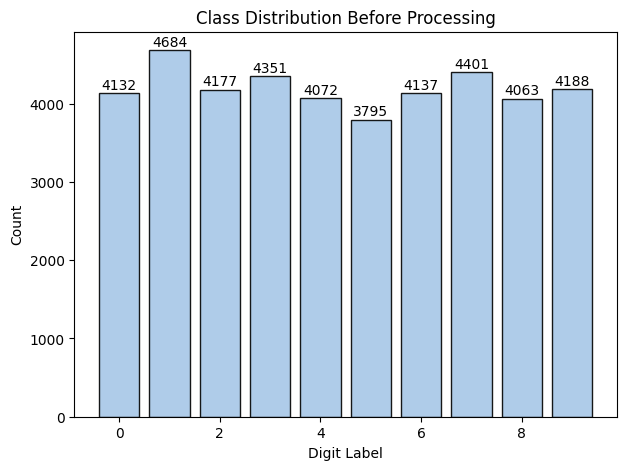

In [33]:
label_counts = train_digit_recognizer_dataframe['label'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
bars = plt.bar(label_counts.index, label_counts.values, color='#A7C7E7', edgecolor='black', alpha=0.9)  # Light blue

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, int(bar.get_height()), ha='center', fontsize=10)

plt.title("Class Distribution Before Processing")
plt.xlabel("Digit Label")
plt.ylabel("Count")

plt.show()


After processing

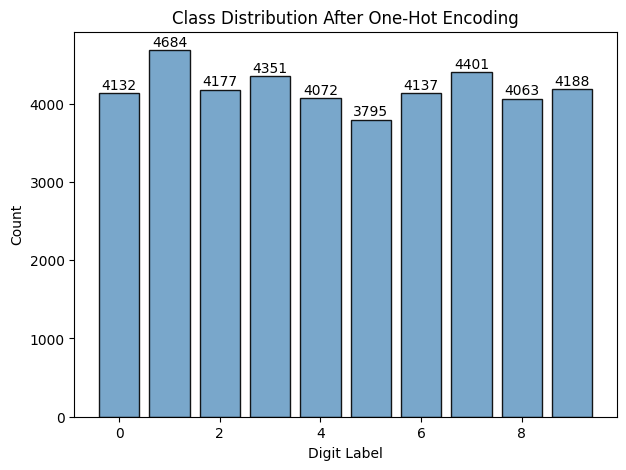

In [34]:
one_hot_sums = np.sum(y_categorized_binary, axis=0)

plt.figure(figsize=(7, 5))
bars = plt.bar(np.arange(10), one_hot_sums, color='#6A9EC6', edgecolor='black', alpha=0.9)  # Light blue

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 50, 
             int(bar.get_height()), 
             ha='center', 
             fontsize=10)

plt.title("Class Distribution After One-Hot Encoding")
plt.xlabel("Digit Label")
plt.ylabel("Count")

plt.show()


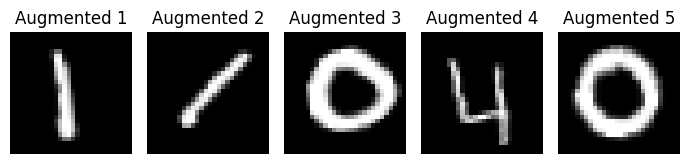

In [35]:
sample_images = X[:5].reshape(5, 28, 28, 1) 

augmented_images = next(augment_data.flow(sample_images, batch_size=5))

fig, axes = plt.subplots(1, 5, figsize=(7, 5))
for i, ax in enumerate(axes):
    ax.imshow(augmented_images[i].reshape(28, 28), cmap="gray")  
    ax.set_title(f"Augmented {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

### PART 10 Data preprocessing specific to the model

All of the preprocessing has been completed scaling, encoding, augmentation were already done in previous sections-  feature engineering and cleansing.

In [36]:
print("\nData preprocessing specific to the model:")
print(f"\nShape of original features: {X.shape}")


Data preprocessing specific to the model:

Shape of original features: (42000, 784)


### PART 11 Splitting

Spliting the data into training and validation sets

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_categorized_binary, test_size=0.2, random_state=42, stratify=y_categorized_binary.argmax(axis=1)
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.5, random_state=42, stratify=y_val.argmax(axis=1)
)

In [38]:
print("\nData Splitting Summary:")
print(f"Train Set: {X_train.shape}, Labels: {y_train.shape}")  
print(f"Test Set: {X_test.shape}, Labels: {y_test.shape}")  
print(f"Validation Set: {X_val.shape}, Labels: {y_val.shape}")  



Data Splitting Summary:
Train Set: (33600, 784), Labels: (33600, 10)
Test Set: (4200, 784), Labels: (4200, 10)
Validation Set: (4200, 784), Labels: (4200, 10)


### PART 12 Overview of the steps to be completed and the rationale

##### The dataset has been split into training, testing, and validation sets, the features have been scaled using MinMaxScaler, and the labels have been converted to binary with the help of one-hot encoding. Now that these three important steps are complete, the models will be trained using multiple neural networks by adjusting hyperparameters such as the number of layers, neurons, activation functions, and different optimization strategies. Once the training is complete, we will evaluate the models using important factors such as accuracy, loss curves, confusion matrices, and ROC curves. With all the information obtained, we will compare the results to understand how neural network configurations impact digit recognition performance. Based on these findings, we will identify the most effective model architecture and determine potential improvements for future experimentation.

### PART 13 Model training cross-validation.



Model 01 - 2 Layers, 10 Neurons per Layer

In [39]:
model_01 = Sequential([
    Flatten(input_shape=(784,)),   # 28x28 = 784
    Dense(10, activation='relu'), # Hidden Layer 1
    Dense(10, activation='relu'),  # Hidden Layer 2
    Dense(10, activation='softmax')  # Output Layer (10 classes)
])


/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-01 17:49:51.348512: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-03-01 17:49:51.348652: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-01 17:49:51.348672: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-01 17:49:51.348864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-01 17:49:51.348875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlo

In [40]:
model_01.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']) # loss function for classification

start_time = time.time()
training_history_1 = model_01.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)
training_time_1 = time.time() - start_time
print(f"\nThe time to train a model that was 2 Layers, 10 Neurons {training_time_1:.2f} seconds.")


Epoch 1/20


2025-03-01 17:49:51.766995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6018 - loss: 1.1848 - val_accuracy: 0.8855 - val_loss: 0.3960
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8967 - loss: 0.3782 - val_accuracy: 0.8888 - val_loss: 0.3799
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8982 - loss: 0.3671 - val_accuracy: 0.8976 - val_loss: 0.3741
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9018 - loss: 0.3549 - val_accuracy: 0.8910 - val_loss: 0.3846
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8982 - loss: 0.3733 - val_accuracy: 0.8945 - val_loss: 0.3872
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8987 - loss: 0.3606 - val_accuracy: 0.8874 - val_loss: 0.4140
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8964 - loss: 0.3788 - val_accuracy: 0.8810 - val_loss: 0.4204
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8830 - loss: 0.42

In [41]:
test_loss_model01, test_accuracy_model01 = model_01.evaluate(X_test, y_test, verbose=0) # Evaluate the model on the test set


In [42]:
print(f"\nModel 1 Test Loss: {test_loss_model01:.4f}") 
print(f"Model 1 Test Accuracy: {test_accuracy_model01:.4f}")


Model 1 Test Loss: 1.2301
Model 1 Test Accuracy: 0.7836


In [43]:
predictions_1 = model_01.predict(X_test).argmax(axis=1)  # Get the class with the highest probability
actual_labels_1 = y_test.argmax(axis=1)  
conf_matrix_1 = confusion_matrix(actual_labels_1, predictions_1)

print(f"\nConfusion Matrix for Model 1 (2 Layers, 10 Neurons):\n", conf_matrix_1)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix for Model 1 (2 Layers, 10 Neurons):
 [[344   0  55   1   1   0   8   1   2   1]
 [  0 437   0   3   5  12   0   2   5   4]
 [ 15   1 318  13  15   2  10  22  10  12]
 [  4   2  18 373   0  12   1   6   6  13]
 [  4   0   2   0 329   3   5   0   2  62]
 [ 13   4  15  12  11 270  10   3  38   4]
 [  5   2   9   0  23   1 361   0   7   6]
 [  8   0   5   5   5   1   0 298   0 118]
 [ 13   8  20  24  16  25   8   0 248  44]
 [  8   0   6   2  78   1   1   4   6 313]]


Model 02 - 2 Layers, 20 Neurons per Layer

In [44]:
model_2 = Sequential([
    Flatten(input_shape=(784,)),  # 28x28 = 784
    Dense(20, activation='relu'),  # Hidden Layer 1
    Dense(20, activation='relu'), # Hidden Layer 2
    Dense(10, activation='softmax')  # Output Layer (10 classes)
])


/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model_2.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
training_history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)
training_time_2 = time.time() - start_time
print(f"\nThe time to train a model with 2 Layers, 20 Neurons was {training_time_2:.2f} seconds.")


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7094 - loss: 0.9231 - val_accuracy: 0.8969 - val_loss: 0.3655
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9070 - loss: 0.3280 - val_accuracy: 0.9029 - val_loss: 0.3433
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9080 - loss: 0.3180 - val_accuracy: 0.8967 - val_loss: 0.3551
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9070 - loss: 0.3278 - val_accuracy: 0.9014 - val_loss: 0.3513
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9035 - loss: 0.3408 - val_accuracy: 0.8917 - val_loss: 0.3987
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8999 - loss: 0.3622 - val_accuracy: 0.8869 - val_loss: 0.4597
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8889 - loss: 0.4269 - val_accuracy: 0.8810 - val_loss: 0.4584
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8736 -

In [46]:
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)

In [164]:
test_accuracy_2

0.7226190567016602

In [47]:
predictions_2 = model_2.predict(X_test).argmax(axis=1)
actual_labels_2 = y_test.argmax(axis=1)
conf_matrix_2 = confusion_matrix(actual_labels_2, predictions_2)

print(f"\nConfusion Matrix for Model 2 (2 Layers, 20 Neurons):\n", conf_matrix_2)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix for Model 2 (2 Layers, 20 Neurons):
 [[304   0  12   7   2  61  15   1   2   9]
 [  0 328  62   3   0  65   4   4   2   0]
 [  1   0 378  11   5   5  13   3   1   1]
 [  6   0  36 355   2  19   1   6   5   5]
 [  0   0   7   0 259   6  12   2   2 119]
 [ 21   1  22  93  32 192   3   3   7   6]
 [  1   0  49   0   2   5 346   0   2   9]
 [  0   0  15   3   3   4   2 262   5 146]
 [  3   2  74  37   0  15   4   3 250  18]
 [  0   0   9   4   7  14   1  20   3 361]]


Model 03 -  5 Layers, 10 Neurons per Layer

In [48]:
model_3 = Sequential([
    Flatten(input_shape=(784,)),  # 28x28 = 784
    Dense(10, activation='relu'),  # Hidden Layer 1
    Dense(10, activation='relu'),  # Hidden Layer 2
    Dense(10, activation='relu'),  #    Hidden Layer 3
    Dense(10, activation='relu'),  # Hidden Layer 4
    Dense(10, activation='relu'), # Hidden Layer 5
    Dense(10, activation='softmax')  # Output Layer (10 classes)
])


/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model_3.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']) # loss function for classification
start_time = time.time()
training_history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)# Train the model
training_time_3 = time.time() - start_time
print(f"\nThe time to train a model with 5 Layers, 10 Neurons was {training_time_3:.2f} seconds.")


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.4938 - loss: 1.4252 - val_accuracy: 0.8336 - val_loss: 0.5909
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8011 - loss: 0.7771 - val_accuracy: 0.5455 - val_loss: 3.2390
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.5051 - loss: 8.4095 - val_accuracy: 0.4212 - val_loss: 28.9497
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.3548 - loss: 51.9503 - val_accuracy: 0.4017 - val_loss: 135.9514
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.2916 - loss: 133.6581 - val_accuracy: 0.3036 - val_loss: 216.6868
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2428 - loss: 275.5424 - val_accuracy: 0.2910 - val_loss: 449.3248
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2106 - loss: 515.2891 - val_accuracy: 0.2933 - val_loss: 816.2946
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - ac

In [50]:
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0) # Evaluate the model on the test set

In [162]:
test_accuracy_3

0.16357143223285675

In [51]:
predictions_3 = model_3.predict(X_test).argmax(axis=1) # Get the class with the highest probability
actual_labels_3 = y_test.argmax(axis=1)
conf_matrix_3 = confusion_matrix(actual_labels_3, predictions_3)

print(f"\nConfusion Matrix for Model 3 (5 Layers, 10 Neurons):\n", conf_matrix_3)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix for Model 3 (5 Layers, 10 Neurons):
 [[  1   0 200   0   0   1   0   3  28 180]
 [  4   0  49   0   0 211   0  40 138  26]
 [  4   0 320   0   0   1   0  15  30  48]
 [  4   0  50   0   0   1   0 184 122  74]
 [  0   0  96   0   0   0   0  31   5 275]
 [  1   0 123   0   0   3   0 190  34  29]
 [  2   0 140   0   0   1  29   8  14 220]
 [  2   0 289   0   0   1   0  89  19  40]
 [  6   0  84   0   0  16   0 106 128  66]
 [  2   0 144   0   0   3   0 131  22 117]]


Model 04 - 5 Layers, 20 Neurons per Layer

In [52]:
model_4 = Sequential([
    Flatten(input_shape=(784,)),  # 28x28 = 784
    Dense(20, activation='relu'),  # Hidden Layer 1
    Dense(20, activation='relu'),  # Hidden Layer 2
    Dense(20, activation='relu'), # Hidden Layer 3
    Dense(20, activation='relu'),  # Hidden Layer 4
    Dense(20, activation='relu'),  # Hidden Layer 5
    Dense(10, activation='softmax')  # Output Layer (10 classes)
])

/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model_4.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']) # loss function for classification
start_time = time.time()
training_history_4 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1) # Train the model
training_time_4 = time.time() - start_time
print(f"\nThe time to train a model with 5 Layers, 20 Neurons was {training_time_4:.2f} seconds.")# Evaluate the model on the test set

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6048 - loss: 1.1693 - val_accuracy: 0.8105 - val_loss: 0.6714
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7101 - loss: 3.3674 - val_accuracy: 0.5424 - val_loss: 23.0529
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.3951 - loss: 93.3263 - val_accuracy: 0.3569 - val_loss: 270.5226
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2937 - loss: 570.5767 - val_accuracy: 0.2474 - val_loss: 1199.0886
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2573 - loss: 2050.6077 - val_accuracy: 0.3048 - val_loss: 4262.9419
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2413 - loss: 4803.6680 - val_accuracy: 0.2700 - val_loss: 9607.4365
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2418 - loss: 9318.3057 - val_accuracy: 0.2133 - val_loss: 19903.7559
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15

In [54]:
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)# Get the class with the highest probability

In [163]:
test_accuracy_4

0.31404760479927063

In [55]:
predictions_4 = model_4.predict(X_test).argmax(axis=1) # Get the class with the highest probability
actual_labels_4 = y_test.argmax(axis=1)
conf_matrix_4 = confusion_matrix(actual_labels_4, predictions_4)

print(f"\nConfusion Matrix for Model 4 (5 Layers, 20 Neurons):\n", conf_matrix_4)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix for Model 4 (5 Layers, 20 Neurons):
 [[121   7  51   2   0  36  15   0  24 157]
 [  0 162   0  73   0   1 163   0   3  66]
 [  1 120 200  41   0   0  33   0   5  18]
 [  0  94   7 146   0   2   0   0  47 139]
 [  5  34  10  20   0   4   3   0 114 217]
 [  0  34  10   6   0  15   9   0 248  58]
 [ 28   9  51   3   0 133 103   0  73  14]
 [103  31  81  16   0   0  23   0   2 184]
 [  0  89   2   5   0  13   8   0 278  11]
 [  1  33  17  18   0   0   1   0  55 294]]


### PART 14 Model Hypertuning 

Model 01 - 2 Layers, 10 Neurons per Layer

In [ ]:
learning_rate_r01 = 0.001    # Learning rate
batch_size_r01 = 32     # Number of samples per batch    
epochsr01 = 20      # Number of passes through the data      
optimizerr01 = Adam(learning_rate=learning_rate_r01)  

In [57]:
model_01_revised = Sequential([
    Flatten(input_shape=(784,)),  # 28x28 = 784
    Dense(10, activation='relu'),# Hidden Layer 1
    Dense(10, activation='softmax')# Output Layer (10 classes)
])

/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:

model_01_revised.compile(optimizer=optimizerr01, loss='categorical_crossentropy', metrics=['accuracy']) # loss function for classification

start_time = time.time()

training_history_01_revised = model_01_revised.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochsr01, batch_size=batch_size_r01, verbose=1)# Train the model

training_time_01_revised = time.time() - start_time

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6709 - loss: 1.1032 - val_accuracy: 0.8971 - val_loss: 0.3646
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9061 - loss: 0.3369 - val_accuracy: 0.9014 - val_loss: 0.3338
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9120 - loss: 0.3175 - val_accuracy: 0.9071 - val_loss: 0.3200
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9145 - loss: 0.2992 - val_accuracy: 0.9090 - val_loss: 0.3301
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9178 - loss: 0.2929 - val_accuracy: 0.9081 - val_loss: 0.3168
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9164 - loss: 0.2943 - val_accuracy: 0.9095 - val_loss: 0.3214
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9204 - loss: 0.2825 - val_accuracy: 0.9048 - val_loss: 0.3310
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9177 - loss: 0.2922

In [60]:
print(f"\ Training Time for Revised Model 1 (LR={learning_rate_r01}, Batch={batch_size_r01}, Epochs={epochsr01}, Optimizer=Adam): {training_time_01_revised:.2f} seconds.") 


\ Training Time for Revised Model 1 (LR=0.001, Batch=32, Epochs=20, Optimizer=Adam): 192.00 seconds.


Model 02 - 2 Layers, 20 Neurons per Layer

In [61]:
learning_rate_rmodel02 = 0.001  # Learning rate
optimizer_rmodel02 = Adam(learning_rate=learning_rate_rmodel02)  # Optimizer
batch_size_rmodel02 = 32  # Number of samples per batch
epochs_rmodel02 = 10  # Number of passes through the data

In [62]:
revisedmodel_02 = Sequential([
    Flatten(input_shape=(784,)),  # Input layer (1)
    Dense(20, activation='relu'),  # First hidden layer
    Dense(20, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax') # Output layer (10 neurons for 10 classes)
])

In [63]:
revisedmodel_02.compile(optimizer=optimizer_rmodel02, loss='categorical_crossentropy', metrics=['accuracy']) # loss function for classification

start_time_02 = time.time()
training_history_02 = revisedmodel_02.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=epochs_rmodel02,batch_size=batch_size_rmodel02,verbose=1)
training_time_02 = time.time() - start_time_02

print(f"\nThe time to train Model 02 (2 Layers, 20 Neurons) was {training_time_02:.2f} seconds.")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7005 - loss: 0.9410 - val_accuracy: 0.9012 - val_loss: 0.3494
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9135 - loss: 0.3135 - val_accuracy: 0.9064 - val_loss: 0.3380
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9178 - loss: 0.2968 - val_accuracy: 0.9095 - val_loss: 0.3366
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9162 - loss: 0.3083 - val_accuracy: 0.8967 - val_loss: 0.3894
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9121 - loss: 0.3146 - val_accuracy: 0.8976 - val_loss: 0.3815
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9076 - loss: 0.3281 - val_accuracy: 0.8900 - val_loss: 0.4290
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8998 - loss: 0.3630 - val_accuracy: 0.8976 - val_loss: 0.4151
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8930 -

In [64]:
test_loss_r02, test_accuracy_r02 = revisedmodel_02.evaluate(X_test, y_test, verbose=0)

In [166]:
test_accuracy_r02

0.883571445941925

Model 03 -  5 Layers, 10 Neurons per Layer

In [65]:
learning_rate_r03 = 0.0005  # Learning rate
optimizer_r03 = SGD(learning_rate=learning_rate_r03)  # Optimizer
batch_size_r03 = 32  # Number of samples per batch
epochs_r03 = 10  # Number of passes through the data


In [66]:
revised_model_03 = Sequential([
    Flatten(input_shape=(784,)),  # Input layer (1)
    Dense(10, activation='relu'),  # First hidden layer
    Dense(10, activation='relu'), # Second hidden layer
    Dense(10, activation='relu'),  # Third hidden layer
    Dense(10, activation='relu'),  # Fourth hidden layer
    Dense(10, activation='relu'),  # Fifth hidden layer
    Dense(10, activation='softmax')  # Output layer (10 neurons for 10 classes)
])


In [67]:
revised_model_03.compile(optimizer=optimizer_r03, loss='categorical_crossentropy', metrics=['accuracy'])
start_time_03 = time.time()
training_history_03 = revised_model_03.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=epochs_r03,batch_size=batch_size_r03,verbose=1)
training_time_03 = time.time() - start_time_03
print(f"\nThe time to train Model 03 (5 Layers, 10 Neurons) was {training_time_03:.2f} seconds.")


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1386 - loss: 2.2474 - val_accuracy: 0.1395 - val_loss: 2.2271
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1378 - loss: 2.2188 - val_accuracy: 0.1617 - val_loss: 2.1975
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1601 - loss: 2.1908 - val_accuracy: 0.1852 - val_loss: 2.1569
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1807 - loss: 2.1466 - val_accuracy: 0.2131 - val_loss: 2.1050
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2295 - loss: 2.0870 - val_accuracy: 0.2893 - val_loss: 2.0443
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3043 - loss: 2.0291 - val_accuracy: 0.3455 - val_loss: 1.9711
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3644 - loss: 1.9439 - val_accuracy: 0.3733 - val_loss: 1.8934
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3792 - loss: 1.8746 - 

In [68]:
test_loss_03, test_accuracy_03 = revised_model_03.evaluate(X_test, y_test, verbose=0)


Model 04 - 5 Layers, 20 Neurons per Layer

In [69]:
learning_rate_r04 = 0.0005  # learning rate 
optimizer_r04 = Adam(learning_rate=learning_rate_r04) # optimizer
batch_size_r04 = 32  # Number of samples per batch
epochs_r04 = 10  # Number of passes through the data

In [70]:
revised_model_04 = Sequential([
    Flatten(input_shape=(784,)),  #  # Input layer (1)
    Dense(20, activation='relu'),  # First hidden layer
    Dense(20, activation='relu'),  # Second hidden layer
    Dense(20, activation='relu'),  # Third hidden layer
    Dense(20, activation='relu'),  # Fourth hidden layer
    Dense(20, activation='relu'),  # Fifth hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])


In [71]:
revised_model_04.compile(optimizer=optimizer_r04, loss='categorical_crossentropy', metrics=['accuracy'])
start_time_04 = time.time()
training_history_04 = revised_model_04.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=epochs_r04,batch_size=batch_size_r04,verbose=1)
training_time_04 = time.time() - start_time_04

print(f"\nThe time to train Model 04 (5 Layers, 20 Neurons) was {training_time_04:.2f} seconds.")


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5037 - loss: 1.3480 - val_accuracy: 0.8162 - val_loss: 0.5968
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8335 - loss: 0.5701 - val_accuracy: 0.8514 - val_loss: 0.5186
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8316 - loss: 0.6494 - val_accuracy: 0.6179 - val_loss: 2.4701
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5982 - loss: 5.6131 - val_accuracy: 0.4874 - val_loss: 19.3543
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.4236 - loss: 31.3869 - val_accuracy: 0.3526 - val_loss: 77.5080
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.3180 - loss: 103.1307 - val_accuracy: 0.2569 - val_loss: 215.7889
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.2822 - loss: 230.9096 - val_accuracy: 0.3619 - val_loss: 265.1410
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accurac

In [72]:
test_loss_04, test_accuracy_04 = revised_model_04.evaluate(X_test, y_test, verbose=0)

In [73]:
print(f"\nModel 04 - Test Accuracy: {test_accuracy_04:.4f}")



Model 04 - Test Accuracy: 0.2295


### PART 15 Model Testing  

Model 01 - 2 Layers, 10 Neurons per Layer

In [75]:
test_lossr01, test_accuracyr01 = model_01_revised.evaluate(X_test, y_test, verbose=0) # Evaluate the model on the test set

In [76]:
print(f"\nModel 01 - Test Loss: {test_lossr01:.4f}")
print(f"Model 01 - Test Accuracy: {test_accuracyr01:.4f}")


Model 01 - Test Loss: 0.3394
Model 01 - Test Accuracy: 0.9033


In [77]:
predictionsr01 = model_01_revised.predict(X_test).argmax(axis=1) # Get the class with the highest probability
actual_labelsr01 = y_test.argmax(axis=1)
conf_matrixr01 = confusion_matrix(actual_labelsr01, predictionsr01)
conf_matrixr01

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[394,   0,   1,   0,   2,   4,  11,   1,   0,   0],
       [  0, 454,   4,   5,   0,   0,   0,   0,   5,   0],
       [  2,   7, 365,  11,   5,   3,  12,   5,   7,   1],
       [  4,   1,  13, 386,   0,  13,   4,   5,   5,   4],
       [  0,   3,   3,   0, 367,   3,   4,   3,   3,  21],
       [  5,   3,   5,  21,   7, 312,   6,   0,  14,   7],
       [  4,   2,   4,   0,   1,   5, 398,   0,   0,   0],
       [  1,   4,   3,   1,   6,   1,   1, 407,   0,  16],
       [  5,  12,   3,  18,   2,  15,   4,   1, 342,   4],
       [  1,   2,   1,   4,  18,   2,   0,  17,   5, 369]])

In [78]:
y_probabilities_r1 = model_01_revised.predict(X_test).ravel()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [79]:
fpr, tpr, _ = roc_curve(y_test.ravel(), model_01_revised.predict(X_test).ravel())
roc_auc = auc(fpr, tpr)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


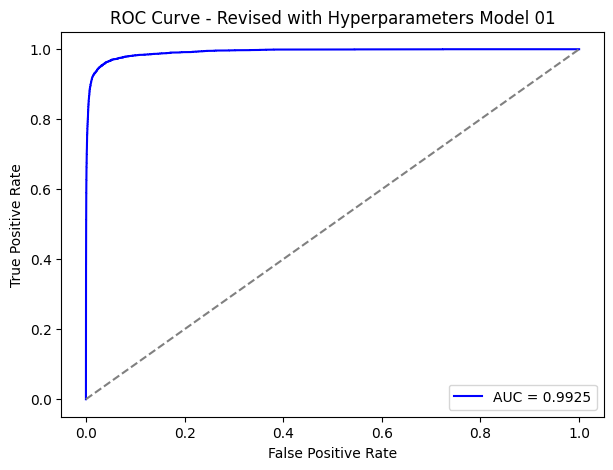

In [80]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], "--", color="gray")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Revised with Hyperparameters Model 01")
plt.legend()
plt.show()



In [81]:
print("\n       Classification Report - Model 01:\n")
print(classification_report(actual_labelsr01, predictionsr01))


       Classification Report - Model 01:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       413
           1       0.93      0.97      0.95       468
           2       0.91      0.87      0.89       418
           3       0.87      0.89      0.88       435
           4       0.90      0.90      0.90       407
           5       0.87      0.82      0.85       380
           6       0.90      0.96      0.93       414
           7       0.93      0.93      0.93       440
           8       0.90      0.84      0.87       406
           9       0.87      0.88      0.88       419

    accuracy                           0.90      4200
   macro avg       0.90      0.90      0.90      4200
weighted avg       0.90      0.90      0.90      4200



Model 02 - 2 Layers, 20 Neurons per Layer

In [82]:
test_loss_r02, test_accuracy_r02 = revisedmodel_02.evaluate(X_test, y_test, verbose=0)

In [83]:
print(f"\n Revised Model 02 - Test Loss: {test_loss_r02:.4f}")
print(f" Revised Model 02 - Test Accuracy: {test_accuracy_r02:.4f}")


 Revised Model 02 - Test Loss: 0.5418
 Revised Model 02 - Test Accuracy: 0.8836


In [84]:
predictions_r02 = revisedmodel_02.predict(X_test).argmax(axis=1)
actual_labels_r02 = y_test.argmax(axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [85]:
conf_matrix_r02 = confusion_matrix(actual_labels_r02, predictions_r02)


In [86]:
print("\nConfusion Matrix for Revised Model 02:\n")
print(conf_matrix_r02)



Confusion Matrix for Revised Model 02:

[[380   1   2   1   1   6  19   1   1   1]
 [  0 449   1   6   0   2   5   0   5   0]
 [  2   1 334  22   7   3   8   5  34   2]
 [  0   3   8 397   1   6   4   4   6   6]
 [  1   7   3   0 364   1   4   2   4  21]
 [  6  16   4  32   6 279  16   1  13   7]
 [  1   4   7   0   1   5 396   0   0   0]
 [  1   0   5   2   6   0   1 409   1  15]
 [  3   8   4  22   1  13   4   1 340  10]
 [  0   2   4   6  17   1   0  22   4 363]]


In [87]:
y_probabilities_r02 = revisedmodel_02.predict(X_test).ravel()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [88]:
fpr_02, tpr_02, _ = roc_curve(y_test.ravel(), y_probabilities_r02)
roc_auc_02 = auc(fpr_02, tpr_02)

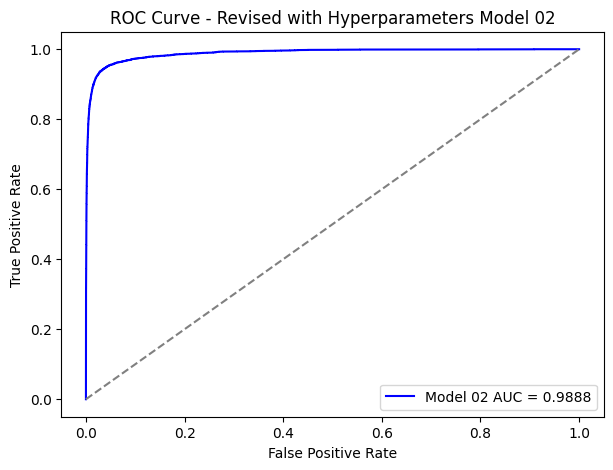

In [89]:
plt.figure(figsize=(7, 5))
plt.plot(fpr_02, tpr_02, color="blue", label=f"Model 02 AUC = {roc_auc_02:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Revised with Hyperparameters Model 02")
plt.legend()
plt.show()

In [90]:
print("\n       Classification Report - Model 02:\n")
print(classification_report(actual_labels_r02, predictions_r02))


       Classification Report - Model 02:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       413
           1       0.91      0.96      0.94       468
           2       0.90      0.80      0.85       418
           3       0.81      0.91      0.86       435
           4       0.90      0.89      0.90       407
           5       0.88      0.73      0.80       380
           6       0.87      0.96      0.91       414
           7       0.92      0.93      0.92       440
           8       0.83      0.84      0.84       406
           9       0.85      0.87      0.86       419

    accuracy                           0.88      4200
   macro avg       0.88      0.88      0.88      4200
weighted avg       0.89      0.88      0.88      4200



Model 03 -  5 Layers, 10 Neurons per Layer

In [91]:
test_loss_r03, test_accuracy_r03 = revised_model_03.evaluate(X_test, y_test, verbose=0)

In [92]:
print(f"\nModel 03 - Test Loss: {test_loss_r03:.4f}")
print(f"Model 03 - Test Accuracy: {test_accuracy_r03:.4f}")


Model 03 - Test Loss: 1.6784
Model 03 - Test Accuracy: 0.4336


In [93]:
predictions_r03 = revised_model_03.predict(X_test).argmax(axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [94]:
actual_labels_r03 = y_test.argmax(axis=1)

In [95]:
conf_matrix_r03 = confusion_matrix(actual_labels_r03, predictions_r03)

In [96]:
conf_matrix_r03

array([[374,   1,   0,   0,   0,   0,  14,  22,   2,   0],
       [  1, 457,   1,   0,   0,   0,   0,   2,   3,   4],
       [ 18, 103, 106,   0,   1,   2, 107,  14,  61,   6],
       [ 34,  91,  41,   1,   0,   9,  39,  32, 151,  37],
       [ 25, 131,  19,   2,   0,  19,  26,  51, 102,  32],
       [ 67,  26,  10,   0,   1,   9,  23, 127,  83,  34],
       [ 38,  55,  59,   1,   2,   1, 244,   5,   8,   1],
       [ 18,  17,   0,   0,   1,   1,   2, 338,  42,  21],
       [  5,  78,   4,   0,   1,   1,   8,  35, 220,  54],
       [ 24,  43,   0,   0,   1,   4,   1, 185,  89,  72]])

In [97]:
print("\n       Classification Report - Model 03:\n")
print(classification_report(actual_labels_r03, predictions_r03))


       Classification Report - Model 03:

              precision    recall  f1-score   support

           0       0.62      0.91      0.74       413
           1       0.46      0.98      0.62       468
           2       0.44      0.25      0.32       418
           3       0.25      0.00      0.00       435
           4       0.00      0.00      0.00       407
           5       0.20      0.02      0.04       380
           6       0.53      0.59      0.56       414
           7       0.42      0.77      0.54       440
           8       0.29      0.54      0.38       406
           9       0.28      0.17      0.21       419

    accuracy                           0.43      4200
   macro avg       0.35      0.42      0.34      4200
weighted avg       0.35      0.43      0.35      4200



In [98]:
y_probabilities_03 = revised_model_03.predict(X_test).ravel()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [99]:
fpr_03, tpr_03, _ = roc_curve(y_test.ravel(), y_probabilities_03)
roc_auc_03 = auc(fpr_03, tpr_03)

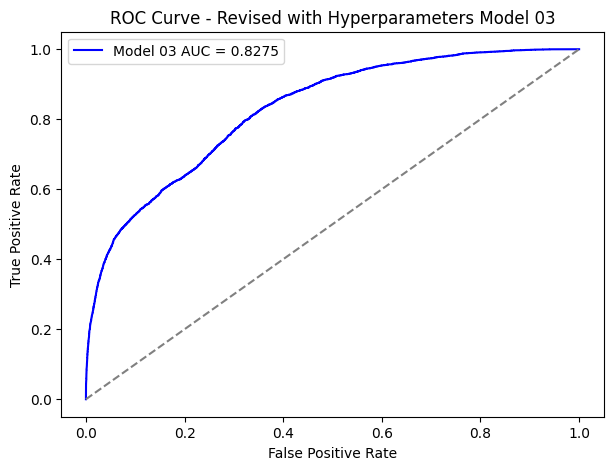

In [100]:
plt.figure(figsize=(7, 5))
plt.plot(fpr_03, tpr_03, color="blue", label=f"Model 03 AUC = {roc_auc_03:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Revised with Hyperparameters Model 03")
plt.legend()
plt.show()

Model 04 - 5 Layers, 20 Neurons per Layer

In [101]:
test_loss_r04, test_accuracy_r04 = revised_model_04.evaluate(X_test, y_test, verbose=0)

In [102]:
print(f"\nModel 04 - Test Loss: {test_loss_r04:.4f}")
print(f"Model 04 - Test Accuracy: {test_accuracy_r04:.4f}")


Model 04 - Test Loss: 1660.2379
Model 04 - Test Accuracy: 0.2295


In [103]:
predictions_r04 = revised_model_04.predict(X_test).argmax(axis=1)
actual_labels_r04 = y_test.argmax(axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [104]:
conf_matrix_r04 = confusion_matrix(actual_labels_r04, predictions_r04)

In [105]:
print(f"\nConfusion Matrix - Model 04:\n", conf_matrix_r04)


Confusion Matrix - Model 04:
 [[  0   0  17  27   0   0  40 227 102   0]
 [  0 194   2 253   0   0   0   0  19   0]
 [  0   2 292   6   0   0   0   0 118   0]
 [  0   2 107 101   1   0   6  14 204   0]
 [  0   0  18 130   7   0  11  21 220   0]
 [  0   1  43 138   2   0   4  35 157   0]
 [  0   2  81 128   1   0  10  74 118   0]
 [  0   0  96  13   1   0   6  39 285   0]
 [  0   0  65  20   0   0   0   0 321   0]
 [  0   0  19 140   5   0   2  23 230   0]]


In [106]:
print("\nClassification Report - Model 04:\n")
print(classification_report(actual_labels_r04, predictions_r04))


Classification Report - Model 04:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       413
           1       0.97      0.41      0.58       468
           2       0.39      0.70      0.50       418
           3       0.11      0.23      0.15       435
           4       0.41      0.02      0.03       407
           5       0.00      0.00      0.00       380
           6       0.13      0.02      0.04       414
           7       0.09      0.09      0.09       440
           8       0.18      0.79      0.29       406
           9       0.00      0.00      0.00       419

    accuracy                           0.23      4200
   macro avg       0.23      0.23      0.17      4200
weighted avg       0.24      0.23      0.17      4200



/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [107]:
y_probabilities_04 = revised_model_04.predict(X_test).ravel()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [108]:
fpr_04, tpr_04, _ = roc_curve(y_test.ravel(), y_probabilities_04)
roc_auc_04 = auc(fpr_04, tpr_04)

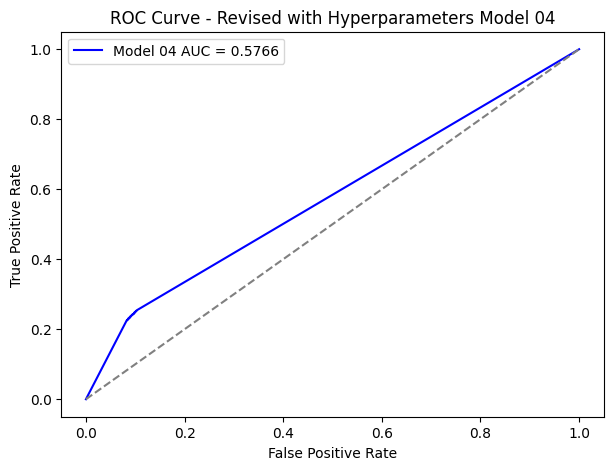

In [109]:
plt.figure(figsize=(7, 5))
plt.plot(fpr_04, tpr_04, color="blue", label=f"Model 04 AUC = {roc_auc_04:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Revised with Hyperparameters Model 04")
plt.legend()
plt.show()

### PART 16 Model evaluation 

In [110]:
model_summary = pd.DataFrame({
    "Model": ["Model 01 (2L-10N)", "Model 02 (2L-20N)", "Model 03 (5L-10N)", "Model 04 (5L-20N)"],
    "Test Accuracy": [test_accuracyr01, test_accuracy_r02, test_accuracy_r03, test_accuracy_r04],
    "AUC Score": [roc_auc, roc_auc_02, roc_auc_03, roc_auc_04],
    "Training Time (s)": [training_time_01_revised, training_time_2, training_time_03, training_time_04],
    "Loss": [test_lossr01, test_loss_r02, test_loss_r03, test_loss_r04]
})

print(" Model Performance Summary:  ")
print(model_summary)


 Model Performance Summary:  
               Model  Test Accuracy  AUC Score  Training Time (s)         Loss
0  Model 01 (2L-10N)       0.903333   0.992504         191.998476     0.339371
1  Model 02 (2L-20N)       0.883571   0.988775         211.467213     0.541799
2  Model 03 (5L-10N)       0.433571   0.827469          84.689987     1.678385
3  Model 04 (5L-20N)       0.229524   0.576648         160.660718  1660.237915


In [111]:
best_model = model_summary.loc[model_summary["Test Accuracy"].idxmax()]
print(f"\nThe best Model from the research is {best_model['Model']} with an Accuracy of {best_model['Test Accuracy']:.4f}")



The best Model from the research is Model 01 (2L-10N) with an Accuracy of 0.9033


Misclassified Digits

Revised model 01

In [112]:
misclassified_model01 = conf_matrixr01.sum(axis=1) - np.diag(conf_matrixr01)  
most_misclassified_digit_model1 = np.argmax(misclassified_model01)
print(f"The most misclassified digit in Model 01 is {most_misclassified_digit_model1}")


The most misclassified digit in Model 01 is 5


Revised Model 2

In [113]:
misclassified_model02 = conf_matrix_r02.sum(axis=1) - np.diag(conf_matrix_r02)  
most_misclassified_digit_02 = np.argmax(misclassified_model02)
print(f"The most misclassified digit in Model 02 is {most_misclassified_digit_02}.")

The most misclassified digit in Model 02 is 5.


Revised Model 03

In [114]:
misclassified_model03 = conf_matrix_r03.sum(axis=1) - np.diag(conf_matrix_r03)  
most_misclassified_digit_03 = np.argmax(misclassified_model03)
print(f"The most misclassified digit in Model 03 is {most_misclassified_digit_03}.")

The most misclassified digit in Model 03 is 3.


Revised Model 04

In [115]:
misclassified_model04 = conf_matrix_r04.sum(axis=1) - np.diag(conf_matrix_r04)  
most_misclassified_digit_04 = np.argmax(misclassified_model04)
print(f"The most misclassified digit in Model 04 is {most_misclassified_digit_04}.")

The most misclassified digit in Model 04 is 9.


Kaggle Submissions 

Model 01

In [123]:
assert test_digit_recognizer_dataframe.shape == (28000, 784), f"Test data shape incorrect: {test_digit_recognizer_dataframe.shape}"

In [125]:
X_test_kaggle = test_digit_recognizer_dataframe.values / 255.0  

In [129]:
predictionsr01 = model_01_revised.predict(X_test_kaggle).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [130]:
assert predictionsr01.shape == (28000,), f"Predictions shape incorrect: {predictionsr01.shape}"

In [131]:
submission = pd.DataFrame({"ImageId": np.arange(1, len(predictionsr01) + 1), "Label": predictionsr01})

In [133]:
submission.to_csv("digit_recognizer_submission_model01.csv", index=False)

Model 02

In [139]:
X_test_kaggle = test_digit_recognizer_dataframe.values / 255.0 

In [141]:
print("Test Dataset Shape:", X_test_kaggle.shape)

Test Dataset Shape: (28000, 784)


In [145]:
predictions_r02 = revisedmodel_02.predict(X_test_kaggle).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [146]:
assert predictions_r02.shape == (28000,), f"Predictions shape incorrect: {predictions_r02.shape}"

In [147]:
submission = pd.DataFrame({"ImageId": np.arange(1, len(predictions_r02) + 1), "Label": predictions_r02})

In [149]:
submission.to_csv("digit_recognizer_submission_model02.csv", index=False)

Model 03

In [154]:
predictions_r03 = revised_model_03.predict(X_test_kaggle).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [155]:
assert predictions_r03.shape == (28000,), f"Predictions shape incorrect: {predictions_r03.shape}"

In [157]:
submission = pd.DataFrame({"ImageId": np.arange(1, len(predictions_r03) + 1), "Label": predictions_r03})

In [158]:
submission.to_csv("digit_recognizer_submission_model03.csv", index=False)

Model 04

In [159]:
predictions_r04 = revised_model_04.predict(X_test_kaggle).argmax(axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [160]:
assert predictions_r04.shape == (28000,), f"Predictions shape incorrect: {predictions_r04.shape}"

In [161]:
submission.to_csv("digit_recognizer_submission_model04.csv", index=False)

### PART 17 Conclusion


##### This research was a great way to understand how different neural network models handle handwriting recognition. The best-performing model was Model 01, which had 2 layers and 10 neurons per layer, achieving an accuracy of 90.93% after tuning the hyperparameters. The second revised model with hyperparameters had a slightly lower accuracy of 0.888810, which showed that increasing the number of neurons did not necessarily improve performance.

##### The third revised model had 5 layers and 10 neurons per layer, and the fourth model had 5 layers and 20 neurons per layer. Both had the lowest scores of about 0.324762 (Model 03) and 0.220238 (Model 04). These two models took the longest to train as they had issues with classification, and due to overfitting, they slowed down the procedure. This overall shows that adding more layers can impact the model’s performance.

##### The most misclassified digits varied across each model, showing that with certain numbers, it was difficult to distinguish them correctly, likely due to similar pixel structures or overlapping features. For the future, it might be a good idea to focus on having better hyperparameters, experimenting with activation functions, or incorporating generalization functions such as dropouts. To conclude, this research showed the importance of learning how to pick hyperparameters wisely, as selecting too many or the wrong ones can cause issues with performance and efficiency.


### PART 18 Management Question
##### The goal of this machine learning research was to be able to develop an eﬀicient model that will recognize different and unique handwritten digits. This is useful in the outside world to be able to understand when in work scenario one is not able to understand a specific numeric.  The specific research is focused on making digit recognition more accurate using neural networks and their hyperparameters to improve performance. In daily life, this will be useful in scenarios such as bank forms or medical forms, where this model can correctly identify handwritten numbers. This is important and will make the process of understanding handwritten forms easier.

### PART 20 References


- ChatGPT. *Accessed February 27, 2025.* [https://chatgpt.com/](https://chatgpt.com/).
- Google. "Classification: ROC and AUC | Machine Learning." *Accessed February 28, 2025.*  
  [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).
- scikit-learn. "Classification_report." *Accessed March 28, 2025.*  
  [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).
- scikit-learn. "Confusion_matrix." *Accessed March 1, 2025.*  
  [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
- Kaggle. "Digit Recognizer." *Accessed February 26, 2025.*  
  [https://www.kaggle.com/competitions/digit-recognizer](https://www.kaggle.com/competitions/digit-recognizer).
- GeeksforGeeks. "Implementing Neural Networks Using TensorFlow." *Accessed February 28, 2022.*  
  [https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/](https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/).
- scikit-learn "MinMaxScaler." *Accessed February 26, 2025.*  
  [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
- Radhakrishnan, Pranoy. "What Are Hyperparameters? And How to Tune the Hyperparameters in a Deep Neural Network?" *Medium,* October 18, 2017.  
  [https://medium.com/towards-data-science/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a](https://medium.com/towards-data-science/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a).
- TensorFlow. "TensorFlow 2 Quickstart for Beginners." *Accessed February 27, 2025.*  
  [https://www.tensorflow.org/tutorials/quickstart/beginner](https://www.tensorflow.org/tutorials/quickstart/beginner).
- TensorFlow."tf.keras.preprocessing.image.ImageDataGenerator: TensorFlow v2.16.1." *Accessed February 27, 2025.*  
  [https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).
